# Laboratorio 3(Regresion logistica) Grupo 2

Implementacion del modelo de regresion logistica para realizar predicciones.

NOMBRE: AMADOR YUCRA LUIS FERNANDO

CARRERA: INGENIERIA DE SISTEMAS

  <h3>
  
  * [Enlace al git hub](https://github.com/lfamadory/SIS420_IA_022024_/tree/cc0fb12371f123b85131d2d12b8a9949ef132a16/LABORATORIOS/Laboratorio3)
  
 <h3>

Para el laboratorio se hizo uso de un dataset para entrenar el modelo de **Regresion Logistica** y predecir si una planta es saludable o no. 

El enlace al dataset es [Plant healt dataset](https://www.kaggle.com/datasets/manutrex78/plant-healt-dataset).

El archivo `plant_health_dataset.csv` contiene un conjunto de datos de entrenamiento de datos si una planta es saludable o no.

In [785]:
#from google.colab import drive
#drive.mount('/content/drive')

In [786]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [787]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = pd.read_csv('plant_health_dataset.csv', delimiter=',')

# Retiramos la columna 'Class' para el vector Y
dataset = data.astype(float)

# Separando el 80% para entrenamiento y el 20% para pruebas
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separar las características y la etiqueta en el conjunto de prueba
X_test = test_dataset.drop(['PlantHealth'], axis=1).values
y_test = test_dataset['PlantHealth'].values

# Separar las características y la etiqueta en el conjunto de entrenamiento
X_train = train_dataset.drop(['PlantHealth'], axis=1).values
y_train = train_dataset['PlantHealth'].values
m_train = len(y_train)

# Imprimir todas las X de datos, solo 10 ejemplos
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
   
      'GreenColorIntensity','SpotArea','NumHoles','LeafHumidity','DustPresence','LeafEdgeType','PlantAge','SunExposureLevel',
      'SoilPHLevel','PlantHeight','NumLeaves','Y'

)) 
print('-' * 210)

for i in range(10):
    print('{:10.0f}{:15.0f}{:12.0f}{:15.0f}{:20.0f}{:12.0f}{:12.0f}{:11.0f}{:15.0f}{:13.0f}{:15.0f}{:25.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], 
        X_train[i, 9],X_train[i, 10], y_train[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))

GreenColorIntensity  SpotArea  NumHolesLeafHumidityDustPresenceLeafEdgeType  PlantAgeSunExposureLevelSoilPHLevelPlantHeight NumLeaves         Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        16             41           3             29                   0           1          35         64              7           12             14                        1
        44             24           3             65                   0           1          45         59              7           35             16                        0
        36             86           7             23                   1           1          11         49              8           45              2                        0
        40              7           7             61                   1           0          47         28          

In [788]:
dataset

,GreenColorIntensity,SpotArea,NumHoles,LeafHumidity,DustPresence,LeafEdgeType,PlantAge,SunExposureLevel,SoilPHLevel,PlantHeight,NumLeaves,PlantHealth
0,54.881350,31.140636,0.0,77.288101,1.0,0.0,60.0,81.366355,4.439019,46.123779,15.430224,0.0
1,71.518937,10.411347,6.0,74.780095,1.0,0.0,12.0,79.126876,6.718602,24.280234,6.350223,1.0
2,60.276338,39.178400,0.0,52.089802,1.0,1.0,23.0,48.337973,7.308505,30.625278,3.649027,0.0
3,54.488318,33.722667,9.0,58.009286,1.0,1.0,30.0,82.852301,7.752859,33.210556,13.704400,1.0
4,42.365480,5.128839,7.0,26.266734,1.0,0.0,50.0,33.669159,3.350603,25.164761,0.612315,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22995,42.399802,2.609715,9.0,67.060864,1.0,0.0,15.0,90.399017,5.728189,13.047866,15.541146,1.0
22996,71.211784,74.115472,3.0,74.791630,1.0,0.0,30.0,57.323648,7.193467,22.664889,3.113026,0.0
22997,41.591113,86.781333,10.0,53.861577,1.0,1.0,6.0,28.198756,4.945747,34.432071,2.159680,1.0
22998,27.832179,70.212346,5.0,30.707832,1.0,1.0,52.0,6.994666,5.973256,37.208107,8.375152,0.0


1.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [789]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Almacenando los datos normalizados en X_norm usando la funcion featureNormalize(), normalizando los datos de X_train

In [790]:
X_norm, mu, sigma= featureNormalize(X_train)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]','Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:10.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7],
          X_norm[i, 8], X_norm[i, 9], X_norm[i, 10],y_train[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
  -1.153  -0.306    -0.631    -0.746  -1.006   1.003   0.283   0.487   0.232    -0.912   0.628     1.000
  -0.212  -0.886    -0.631     0.507  -1.006   1.003   0.849   0.307   0.271     0.700   1.013     0.000
  -0.479   1.262     0.629    -0.953   0.994   1.003  -1.076  -0.022   0.599     1.359  -1.301     0.000
  -0.342  -1.469     0.629     0.361   0.994  -0.997   0.962  -0.779   1.480    -0.467  -1.007     0.000
  -1.012   0.002     1.259     0.969   0.994  -0.997   1.472   0.159  -0.635     0.495   0.093     0.000
  -0.457   0.604     0.629     0.971  -1.006   1.003  -1.303  -0.270   1.352     0.725   0.774     1.000
   0.737  -1.419    -0.631    -0.174  -1.006  -0.997  -0.623  -0.586   1.213    -1.382   0.034     1.000
  -0.608   0.474    -0.316     1.083  -1.006  -0

Añadimos una columan de unos a la matriz de X_norm, esto para hacer complemento a Theta cero:

In [791]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]', 'Y'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:12.5f}{:14.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7],
          X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11],  y_train[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         Y
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -1.153    -0.306    -0.631  -0.746  -1.006   1.003   0.283   0.487     0.232  -0.912     0.62841         1.000
   1.000  -0.212    -0.886    -0.631   0.507  -1.006   1.003   0.849   0.307     0.271   0.700     1.01284         0.000
   1.000  -0.479     1.262     0.629  -0.953   0.994   1.003  -1.076  -0.022     0.599   1.359    -1.30138         0.000
   1.000  -0.342    -1.469     0.629   0.361   0.994  -0.997   0.962  -0.779     1.480  -0.467    -1.00699         0.000
   1.000  -1.012     0.002     1.259   0.969   0.994  -0.997   1.472   0.159    -0.635   0.495     0.09340         0.000
   1.000  -0.457     0.604     0.629   0.971  -1.006   1.003  -1.303  -0.270     1.352   0.725     0.77381         1.000
   1.000   0.737    -1.419 

### 1.2 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [792]:

def plotData(X, y, num_samples):
    # Selecciona las primeras `num_samples` filas
    X_sample = X[:num_samples]
    y_sample = y[:num_samples]

    # Crea una nueva figura
    fig = pyplot.figure()

    # Encuentra los índices de ejemplos positivos y negativos en la muestra
    pos = y_sample == 1
    neg = y_sample == 0

    # Grafica los ejemplos de la muestra
    pyplot.plot(X_sample[pos, 0], X_sample[pos, 1], 'k*', lw=2, ms=10, label='Positivos')
    pyplot.plot(X_sample[neg, 0], X_sample[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1, label='Negativos')


    

Se llama a la función implementada para mostrar los datos cargados:

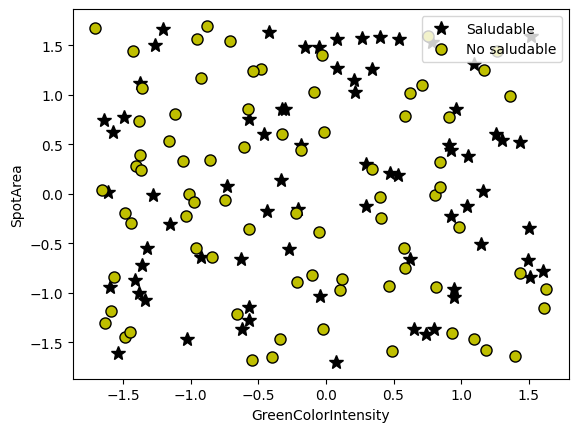

In [793]:
plotData(X_norm, y_train, num_samples=150)
# adiciona etiquetas para los ejes
pyplot.xlabel('GreenColorIntensity')
pyplot.ylabel('SpotArea')
pyplot.legend(['Saludable', 'No saludable'])
pass

1.3 Creacion de la funcion Sigmoide

También conocida como la función logística, es una función matemática que toma cualquier número real como entrada y devuelve un valor en el rango de 0 a 1. Donde nuestra Z es nuestra hipotesis.

In [794]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con z=0, se debe obtener un resultado de 0.5.

In [795]:
print(sigmoid(0))

0.5


Experimentando con otros valores de z. por ejemplo un array.

In [796]:
# Prueba la implementacion de la funcion sigmoid
z = [0.4, 0.6, 5.5]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0.4, 0.6, 5.5] ) =  [0.59868766 0.64565631 0.99592986]


<a id="section2"></a>
#### 1.4 Descenso por el gradiente

Al igual que regresion lineal se aplicara el descenso por la gradiente, con la diferencia que aqui se hara el uso de la funcion sigmoid():

1.4.1 Cálculo del costo J

La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [797]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

1.4.2 Descenso por el gradiente
El costo J esta parametrizado por el vector 0, no X y Y. Donde hay que minimizar el valor de J0 cambiando los valores del vector 0. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de J0 y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la sigmoid()

In [798]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Se inicializan los parametros 0 con 0 y la taza de aprendizaje alpha con 0.001.

In [799]:
#creamos un theta con 11 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite = 4000
alpha = 0.001

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("---------------------------------------------------------------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"--------------------------------------------------------------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

---------------------------------------------------------------
Los valores de theta calculados son:
theta 1: 0.010719522483572188
theta 2: -0.002617946374836677
theta 3: 0.0008467582082901134
theta 4: 0.007359877597761541
theta 5: -0.001731168318097373
theta 6: -0.005581272760118571
theta 7: 0.0023693195926928505
theta 8: -0.0035788386535480898
theta 9: -0.003354293570707259
theta 10: 0.005510797395746574
theta 11: 0.005645122270355903
theta 12: 0.004418623684026829
--------------------------------------------------------------
con un costo de: 0.6930599703995434 


1.5 Grafica de la convergencia del costo

Se utilizan los parametros finales para graficar la linea, graficamos el costo:

Text(0, 0.5, 'Costo J')

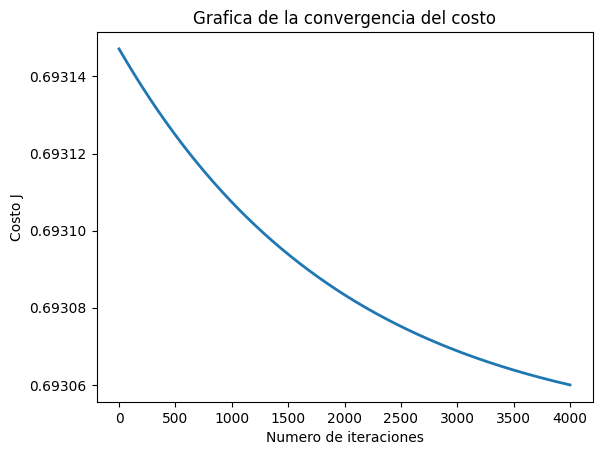

In [800]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Haciendo la prueba con un ejemplo

In [801]:
# Supongamos que tu modelo usa una columna de unos
X_array = [54.88135039273247,31.140635866536424,0.0,77.28810130557588,1.0,0.0,60.0,81.36635508073515,4.439019359991097,46.12377905974735,15.430223721509783,0.0]
X_array_normalizado = [1] + [(x - mu[i]) / sigma[i] for i, x in enumerate(X_array[1:])]

# La columna de unos es la primera
resultados = sigmoid(np.dot(X_array_normalizado, theta))

print(f"Una planta con las características: {X_array}")
print(f'Tiene una probabilidad de ser saludable: {resultados * 100} %')
print(f"Con valores de theta: {theta}")

Una planta con las características: [54.88135039273247, 31.140635866536424, 0.0, 77.28810130557588, 1.0, 0.0, 60.0, 81.36635508073515, 4.439019359991097, 46.12377905974735, 15.430223721509783, 0.0]
Tiene una probabilidad de ser saludable: 63.671208505876265 %
Con valores de theta: [ 0.01071952 -0.00261795  0.00084676  0.00735988 -0.00173117 -0.00558127
  0.00236932 -0.00357884 -0.00335429  0.0055108   0.00564512  0.00441862]


1.6 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

1.6.1 Definiendo nuestro umbral clasificador

Donde:

Si h(0) >= 0.5, predice "y = 1".
Si h(0)< 0.5 , predice "y = 0".

In [802]:
nombres_columnas = [ 'GreenColorIntensity','SpotArea','NumHoles','LeafHumidity','DustPresence','LeafEdgeType','PlantAge','SunExposureLevel',
                    'SoilPHLevel','PlantHeight','NumLeaves','PlantHealth','PlantHealth(Si/No)']

matriz_datos = np.array([
[54.88135039273247,31.140635866536424,0.0,77.28810130557588,1.0,0.0,60.0,81.36635508073515,4.439019359991097,46.12377905974735,15.430223721509783],
[71.51893663724195,10.411346571775281,6.0,74.7800946854939,1.0,0.0,12.0,79.12687583907473,6.718602190395711,24.280234094108756,6.350222529678664],
[60.276337607164386,39.178399580222944,0.0,52.08980150995674,1.0,1.0,23.0,48.33797286144824,7.30850497393211,30.625277972959335,3.649026900969363],
[54.48831829968969,33.722666628817635,9.0,58.00928564362575,1.0,1.0,30.0,82.85230079836259,7.752859068824515,33.21055552653956,13.704399945772394],
[42.36547993389047,5.1288392311394375,7.0,26.26673370967446,1.0,0.0,50.0,33.669158511529254,3.3506033135019373,25.164761201545875,0.6123146820355352],
[64.58941130666561,24.40080566705212,3.0,91.9586605952063,1.0,1.0,57.0,71.19750371017082,4.216905616315261,17.6000395455509,3.4003551133153898],
[43.75872112626925,13.094021915492139,8.0,44.56999593611134,0.0,1.0,19.0,58.63272599313952,5.3448093569225525,29.543493261655506,1.8633960034811325],
[89.17730007820798,51.43186435345755,3.0,75.73490150021675,1.0,0.0,30.0,8.879545898004547,6.5716928458237724,3.7490530074483663,18.649912898526132],
[96.36627605010293,68.55156918587323,5.0,6.8274941013064865,1.0,0.0,16.0,10.970594567228053,3.6557847699778905,36.5812076220693,15.959211695375169],
[38.34415188257777,63.82071020051393,3.0,36.733616854508355,1.0,0.0,28.0,11.090857876984428,5.946009082955463,9.166738024139098,14.840510733757313],
[79.17250380826646,77.99533794095453,5.0,70.50679200556792,1.0,1.0,14.0,15.946310648002859,4.308996895403464,44.50947256134186,6.823800282319635],
])

para_tabla = matriz_datos.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertimos la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si es o no saludable
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-----------------------+------------+------------+----------------+----------------+----------------+------------+--------------------+---------------+---------------+-------------+---------------+----------------------+
|   GreenColorIntensity |   SpotArea |   NumHoles |   LeafHumidity |   DustPresence |   LeafEdgeType |   PlantAge |   SunExposureLevel |   SoilPHLevel |   PlantHeight |   NumLeaves |   PlantHealth |   PlantHealth(Si/No) |
+=======================+============+============+================+================+================+============+====================+===============+===============+=============+===============+======================+
|               54.8814 |   31.1406  |          0 |       77.2881  |              1 |              0 |         60 |           81.3664  |       4.43902 |      46.1238  |   15.4302   |      0.49638  |                    0 |
+-----------------------+------------+------------+----------------+----------------+----------------+----------

1.7 Validaciones

Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

1.7.1 Normalizamos el X_test que es el 20% separado a un incio:

In [803]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)


1.7.2 Concadenamos unos a matriz X normalizado del test:

In [804]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 120)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
------------------------------------------------------------------------------------------------------------------------
   1.000   1.062    -1.141     1.259   1.653  -1.006  -0.997  -1.303   0.580    -0.044  -0.514  -1.004
   1.000   0.367     1.624     1.574  -0.992  -1.006   1.003  -0.963   0.784    -1.659   0.052   0.355
   1.000  -1.543    -1.145    -0.001   0.472   0.994  -0.997  -1.020   0.849     1.146   0.657   1.491
   1.000  -0.711    -1.709    -0.316  -0.314  -1.006  -0.997   0.283   0.903    -0.816  -0.789   1.315
   1.000   0.026    -1.555     1.259   1.197  -1.006   1.003   0.962   0.532     1.724   0.623   0.919
   1.000  -1.239     0.508    -0.946   0.835  -1.006   1.003  -0.453   0.849    -0.615  -0.813  -0.894
   1.000  -1.191    -0.689    -0.946  -0.621  -1.006   1.003   0.056   0.349     1.711  -1.716  -1.261
   1.000   1.688     1.501    -1.576   0.832  -1.006

1.7.3 Hacemos el calculo de Y predicha

In [805]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta.T)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 180)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], y_predicha[i], y_umbral[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   1.000   1.062    -1.141     1.259   1.653  -1.006  -0.997  -1.303   0.580    -0.044  -0.514  -1.004           0.50              1
   1.000   0.367     1.624     1.574  -0.992  -1.006   1.003  -0.963   0.784    -1.659   0.052   0.355           0.51              1
   1.000  -1.543    -1.145    -0.001   0.472   0.994  -0.997  -1.020   0.849     1.146   0.657   1.491           0.51              1
   1.000  -0.711    -1.709    -0.316  -0.314  -1.006  -0.997   0.283   0.903    -0.816  -0.789   1.315           0.50              1
   1.000   0.026    -1.555     1.259   1.197  -1.006   1.003   0.962   0.532     1.724   0.623   0.919           0.51              1
   1.000  -1.

1.7.4 Calculando la precision del entrenamiento:
se hace uso del np.mean, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en y_predicha e y_test.

In [806]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 49.67 %


1.7.5 Concluciones
Se puede observar que la precision de prediccion es de un 50.50%, lo cual esta por encima del 50% pero casi por muy debajo del 100%, si bien nos predicciones casi acertadas en un 49.70% no es muy confiable para predicciones relacionadas a salud de plantas, la precisión del 49.72% podría indicar que el modelo tiene cierto grado de capacidad predictiva, pero puede que no sea suficientemente alto para algunos casos donde la precisión es crítica.

In [807]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad 

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [808]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(X_ready.shape[1])
print(initial_theta)
cost, grad = costFunction(initial_theta, X_ready, y_train)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.00423913  0.00101435 -0.00031504 -0.00292435  0.00071702  0.00219976
 -0.00093544  0.00143587  0.00134756 -0.00218778 -0.0022195  -0.00176492]
Gradiente en theta inicial (zeros):
	[-0.0042, 0.0010, -0.0003]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [809]:
# Agregar una columna de unos a X_test para el término de sesgo
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Inicialización de theta con el tamaño adecuado (incluyendo el término de sesgo)
test_theta = np.zeros(X_test.shape[1])

# Cálculo de costo y gradiente
cost, grad = costFunction(test_theta, X_test, y_test)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

Costo en theta prueba: 0.693
Costo esperado (aproximado): 0.218



<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [810]:
def predict(theta, X):
    
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [811]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([ 55, 31, 0, 77, 1, 0, 60, 81, 4, 46, 15, 0], theta))
print('Para una planta con caracteristicas de 52,2,4,24,46,2,25,95,13,9,1,29,0 , se predice una probabilidad de ser saludable de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X_ready)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para una planta con caracteristicas de 52,2,4,24,46,2,25,95,13,9,1,29,0 , se predice una probabilidad de ser saludable de: 0.777%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 50.50 %
Precisión esperada (aproximadamente): 89.00 %
